In [59]:
# Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import control
from control import tf, ss, step_response, bode, nyquist, rlocus
import scipy.signal as signal
from scipy.integrate import odeint
import pandas as pd
import sympy as sp

# Configuración de estilo para gráficas
plt.style.use('default')
plt.rcParams['lines.linewidth'] = 3.0  # Hacer las líneas más gruesas
plt.rcParams['grid.linewidth'] = 0.5   # Líneas de la cuadrícula más delgadas
plt.rcParams['axes.linewidth'] = 1.5   # Ejes más gruesos
%matplotlib inline

# Guía Completa de Sistemas de Control

Esta guía aborda los conceptos fundamentales de sistemas de control, desde el modelado hasta el análisis en el espacio de estados, incluyendo ejemplos prácticos y visualizaciones interactivas.

## Contenido
1. [Modelado de Sistemas](#modelado)
2. [Respuesta Temporal](#respuesta-temporal)
3. [Curva de Raíces](#curva-raices)
4. [Compensadores](#compensadores)
5. [Análisis en Frecuencia](#frecuencia)
6. [Espacio de Estados](#espacio-estados)

# 1. Modelado de Sistemas {#modelado}

El modelado de sistemas es el primer paso fundamental en el análisis y diseño de sistemas de control. En esta sección aprenderemos:

1. Funciones de transferencia
2. Representación de sistemas
3. Respuesta a diferentes entradas
4. Análisis de estabilidad básico

## Funciones de Transferencia

Una función de transferencia es una representación matemática de la relación entre la entrada y la salida de un sistema lineal e invariante en el tiempo (LTI). Se define como el cociente de la transformada de Laplace de la salida entre la transformada de Laplace de la entrada, asumiendo condiciones iniciales nulas.

Función de transferencia:
<TransferFunction>: sys[338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1


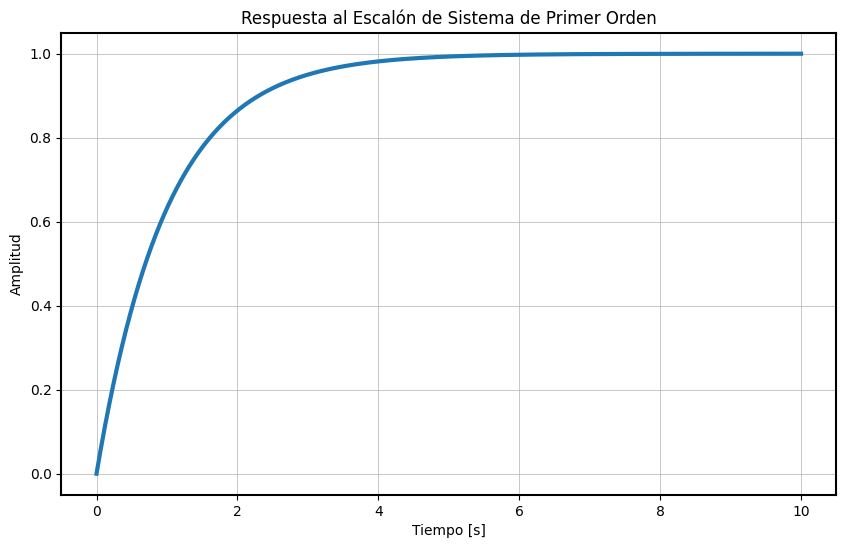

In [60]:
# Ejemplo 1: Sistema de primer orden
# Función de transferencia G(s) = 1/(s + 1)
num = [1]        # Numerador
den = [1, 1]     # Denominador
G = control.tf(num, den)

print("Función de transferencia:")
print(G)

# Generamos la respuesta al escalón
t = np.linspace(0, 10, 1000)
t, y = control.step_response(G, t)

# Graficamos la respuesta
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid(True)
plt.title('Respuesta al Escalón de Sistema de Primer Orden')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# 2. Respuesta Temporal {#respuesta-temporal}

La respuesta temporal de un sistema nos permite analizar su comportamiento en el dominio del tiempo. Los aspectos clave incluyen:

1. Tiempo de establecimiento
2. Sobrepico
3. Tiempo de subida
4. Error en estado estacionario

## Análisis de la Respuesta Temporal

Para sistemas de segundo orden, la respuesta temporal está caracterizada por parámetros como:
- Factor de amortiguamiento (ζ)
- Frecuencia natural no amortiguada (ωn)
- Coeficiente de amortiguamiento (σ)

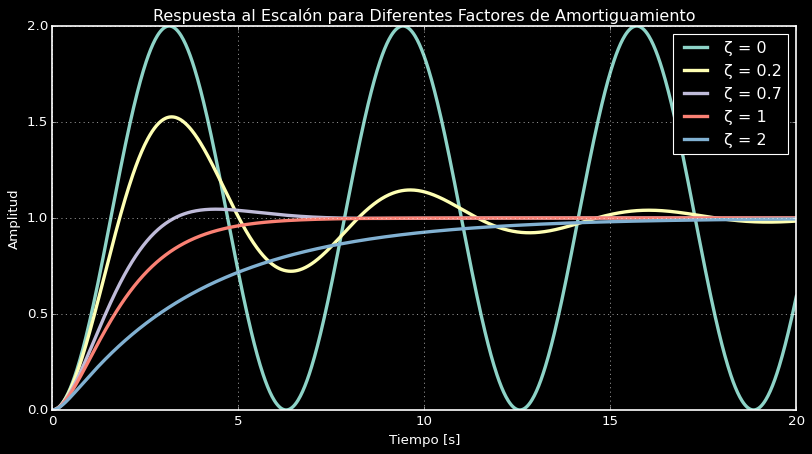

In [26]:
# Ejemplo 2: Análisis de sistema de segundo orden con diferentes amortiguamientos
# Función de transferencia general: G(s) = ωn²/(s² + 2ζωn·s + ωn²)

wn = 1  # Frecuencia natural
zeta_values = [0, 0.2, 0.7, 1, 2]  # Diferentes factores de amortiguamiento
t = np.linspace(0, 20, 1000)

plt.figure(figsize=(12, 6))

for zeta in zeta_values:
    # Crear sistema
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = control.tf(num, den)
    
    # Obtener respuesta al escalón
    t, y = control.step_response(sys, t)
    
    # Graficar
    plt.plot(t, y, label=f'ζ = {zeta}')

plt.grid(True)
plt.legend()
plt.title('Respuesta al Escalón para Diferentes Factores de Amortiguamiento')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# 3. Curva de Raíces {#curva-raices}

El lugar geométrico de las raíces (Root Locus) es una herramienta gráfica que muestra cómo los polos en lazo cerrado de un sistema varían cuando se modifica la ganancia del controlador. Este método nos permite:

1. Analizar la estabilidad del sistema
2. Seleccionar ganancias apropiadas
3. Diseñar compensadores
4. Visualizar el efecto del control sobre los polos dominantes

## Reglas del Lugar Geométrico de las Raíces

- Comienza en los polos de lazo abierto
- Termina en los ceros de lazo abierto o en el infinito
- Las ramas son simétricas respecto al eje real
- Los puntos sobre el eje real pertenecen al lugar cuando hay un número impar de polos y ceros reales a su derecha

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


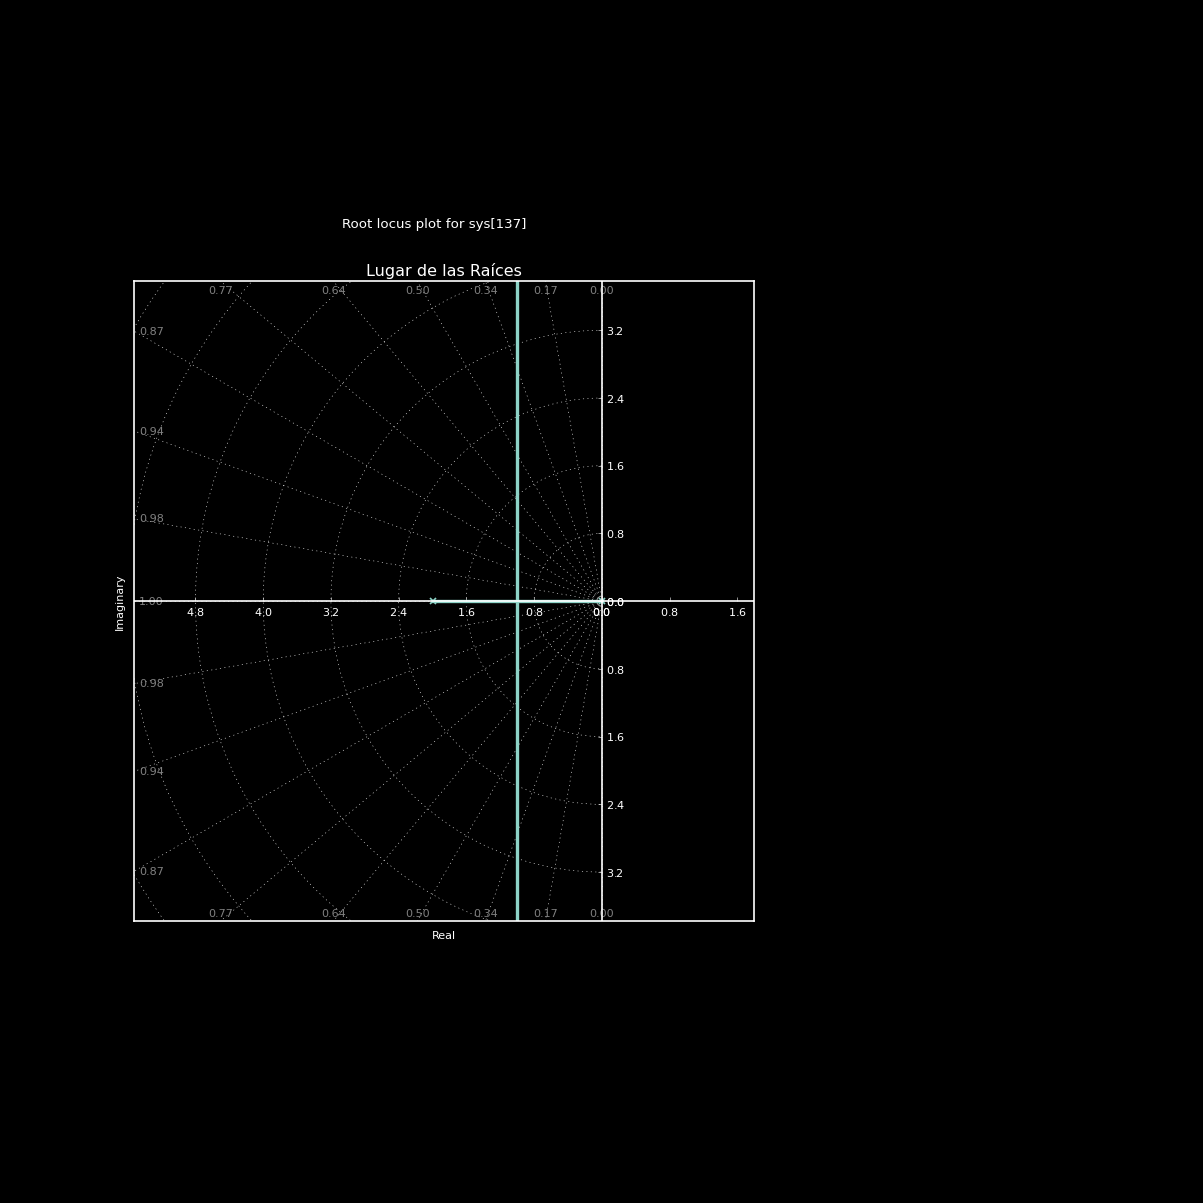

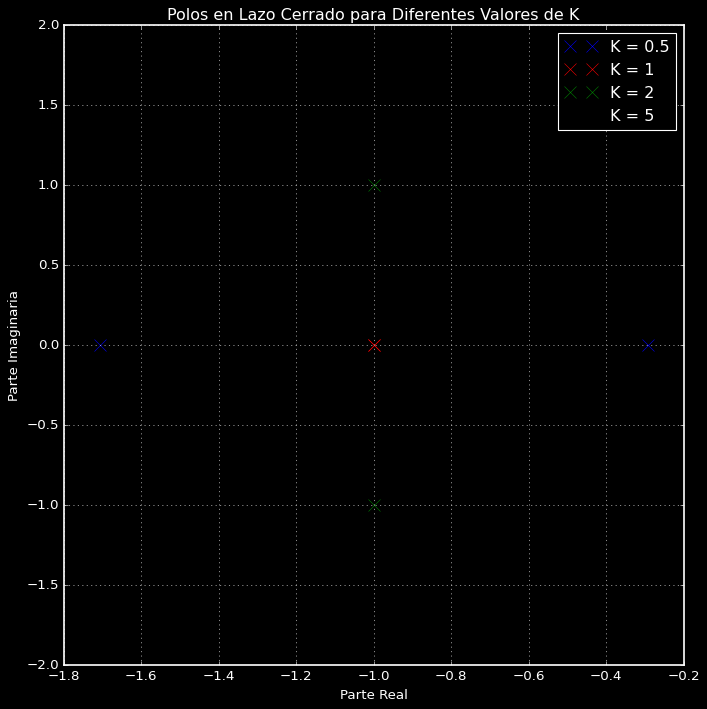

In [27]:
# Ejemplo 3: Lugar de las raíces de un sistema de segundo orden
# Sistema: G(s) = K / (s(s + 2))

num = [1]
den = [1, 2, 0]  # s² + 2s
sys = control.tf(num, den)

# Generar el lugar de las raíces
plt.figure(figsize=(10, 10))
control.root_locus(sys)
plt.title('Lugar de las Raíces')
plt.grid(True)
plt.show()

# Analizar puntos específicos del lugar de las raíces
K_values = [0.5, 1, 2, 5]
colors = ['b', 'r', 'g', 'k']

plt.figure(figsize=(10, 10))
for K, color in zip(K_values, colors):
    # Calcular polos en lazo cerrado
    sys_cl = control.feedback(K * sys)
    poles = control.poles(sys_cl)
    plt.plot(poles.real, poles.imag, 'x', color=color, markersize=10, 
             label=f'K = {K}')

plt.grid(True)
plt.legend()
plt.title('Polos en Lazo Cerrado para Diferentes Valores de K')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.show()

# 4. Compensadores {#compensadores}

Los compensadores son elementos que se añaden al sistema de control para mejorar su desempeño. Los tipos principales son:

1. Compensador de adelanto (Lead)
   - Mejora la respuesta transitoria
   - Aumenta el margen de fase
   - Reduce el tiempo de establecimiento

2. Compensador de atraso (Lag)
   - Mejora la respuesta en estado estacionario
   - Reduce el error en estado estacionario
   - No afecta significativamente la respuesta transitoria

3. Compensador de atraso-adelanto (Lag-Lead)
   - Combina las ventajas de ambos tipos
   - Mejora tanto la respuesta transitoria como el error en estado estacionario

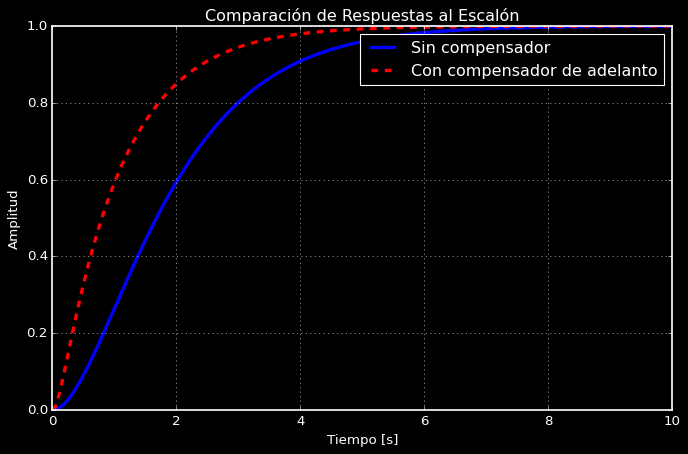

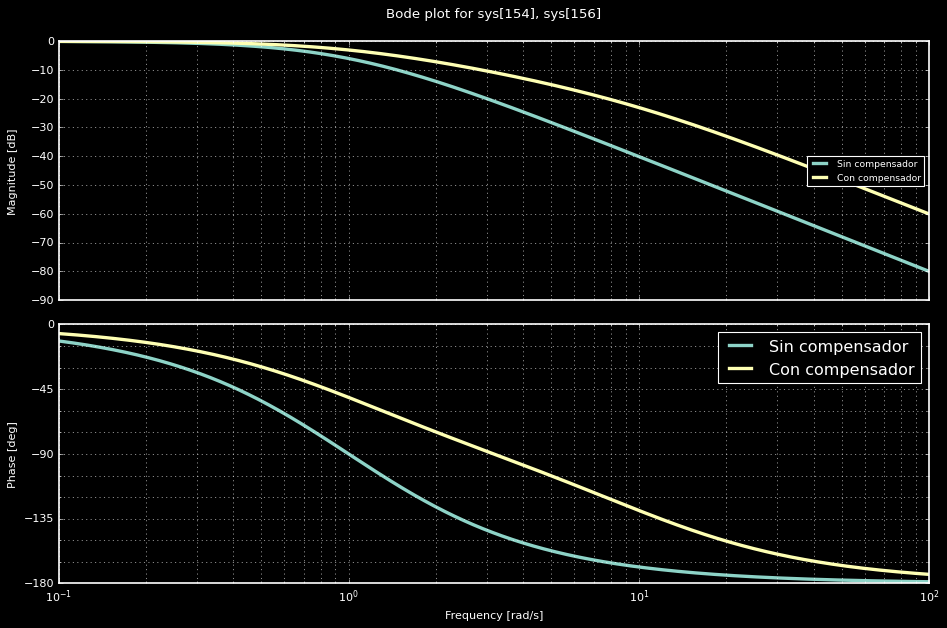

In [28]:
# Ejemplo 4: Diseño de un compensador de adelanto
# Sistema original
G = control.tf([1], [1, 2, 1])  # G(s) = 1/(s² + 2s + 1)

# Compensador de adelanto
alpha = 0.1  # Factor de adelanto
T = 1.0      # Constante de tiempo
num_c = [T, 1]
den_c = [alpha*T, 1]
C = control.tf(num_c, den_c)

# Sistema compensado
G_comp = C * G

# Comparar respuestas al escalón
t = np.linspace(0, 10, 1000)
t1, y1 = control.step_response(G, t)
t2, y2 = control.step_response(G_comp, t)

plt.figure(figsize=(10, 6))
plt.plot(t1, y1, 'b-', label='Sin compensador')
plt.plot(t2, y2, 'r--', label='Con compensador de adelanto')
plt.grid(True)
plt.legend()
plt.title('Comparación de Respuestas al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Comparar diagramas de Bode
plt.figure(figsize=(12, 8))
control.bode_plot([G, G_comp], dB=True, Hz=False, 
                 label=['Sin compensador', 'Con compensador'])
plt.legend()
plt.show()

# 5. Análisis en Frecuencia {#frecuencia}

El análisis en frecuencia es una herramienta fundamental para estudiar el comportamiento de sistemas de control. Los métodos principales incluyen:

1. Diagramas de Bode
   - Magnitud vs. frecuencia
   - Fase vs. frecuencia
   - Márgenes de ganancia y fase

2. Diagrama de Nyquist
   - Estabilidad del sistema
   - Criterio de estabilidad de Nyquist
   - Contornos de Nyquist

3. Diagrama de Nichols
   - Combinación de magnitud y fase
   - Diseño de compensadores
   - Análisis de estabilidad

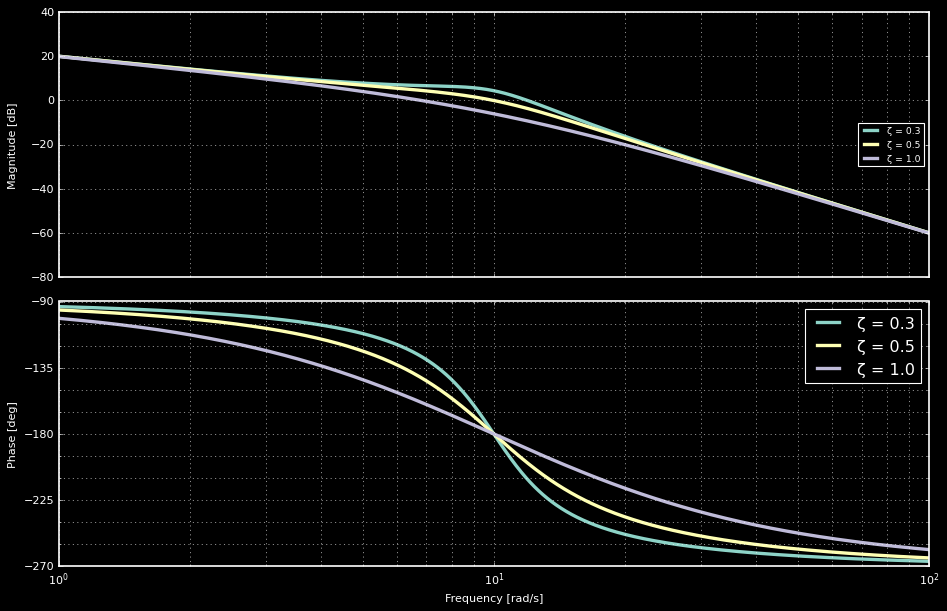

c:\Users\lauch\AppData\Local\Programs\Python\Python310\lib\site-packages\control\freqplot.py:1852: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


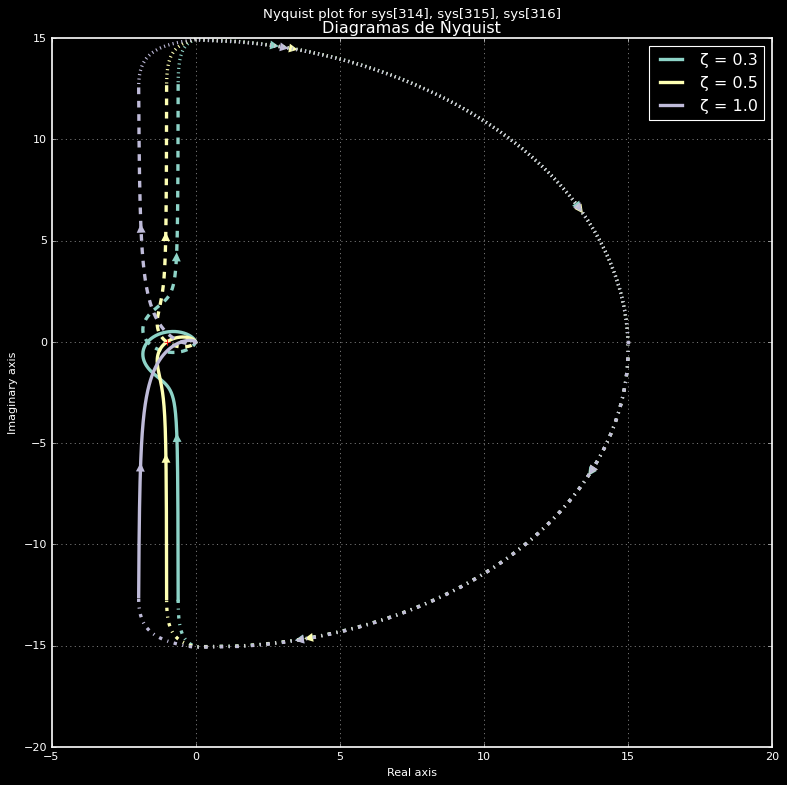

In [53]:
# Ejemplo 5: Análisis en frecuencia de un sistema de segundo orden
# Sistema: G(s) = ω²/(s² + 2ζωs + ω²)

wn = 10  # Frecuencia natural
zeta_values = [0.3, 0.5, 1.0]  # Diferentes factores de amortiguamiento

# Crear sistemas
systems = []
for zeta in zeta_values:
    num = [10*wn**2]
    den = [1, 2*zeta*wn, wn**2, 0]
    systems.append(control.tf(num, den))

# Diagramas de Bode
plt.figure(figsize=(12, 8))
for sys, zeta in zip(systems, zeta_values):
    control.bode_plot(sys, dB=True, Hz=False, label=f'ζ = {zeta}')
plt.legend()
plt.show()

# Diagramas de Nyquist
plt.figure(figsize=(10, 10))
for sys, zeta in zip(systems, zeta_values):
    control.nyquist_plot(sys, label=f'ζ = {zeta}')
plt.grid(True)
plt.legend()
plt.title('Diagramas de Nyquist')
plt.show()

# Carta de Nichols y Análisis {#nichols}

La carta de Nichols es otra forma de visualizar la relación entre la ganancia (en dB) y la fase (en grados) de un sistema en lazo abierto, combinando la información de magnitud y fase en un único gráfico útil para el diseño de compensadores. En esta sección se mostrará cómo trazar la carta de Nichols para los sistemas de ejemplo y cómo interpretar márgenes de ganancia y fase.

Puntos clave:
- La carta de Nichols muestra magnitud (dB) en el eje vertical y fase (grados) en el eje horizontal.
- Se suelen marcar las curvas del sistema sin compensador y con compensador para ver el efecto del diseño.
- Los márgenes de ganancia y fase calculados numéricamente ayudan a cuantificar estabilidad y robustez.

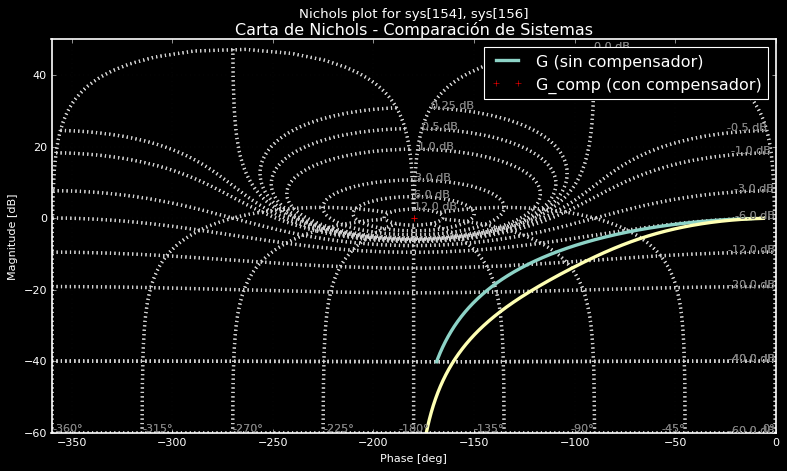


Márgenes de estabilidad (ganancia, fase, wg, wp):
G (sin compensador): (inf, inf, nan, nan)
G_comp (con compensador): (inf, inf, nan, nan)


In [54]:
# Ejemplo: Carta de Nichols para sistemas de ejemplo
# Intentamos graficar G y G_comp (si existen), si no usamos la lista 'systems'

plt.figure(figsize=(10, 6))
plotted = []
labels = []

try:
    # Si hay G definido (ej. del capítulo de compensadores)
    control.nichols_plot(G)
    plotted.append(G)
    labels.append('G (sin compensador)')
except NameError:
    pass

try:
    control.nichols_plot(G_comp)
    plotted.append(G_comp)
    labels.append('G_comp (con compensador)')
except NameError:
    pass

# Si no se graficó nada aún, usamos los sistemas definidos en esta sección
if len(plotted) == 0:
    try:
        for sys, zeta in zip(systems, zeta_values):
            control.nichols_plot(sys, dB=True)
            labels.append(f'ζ = {zeta}')
    except NameError:
        # En caso de que tampoco 'systems' exista, construimos un ejemplo rápido
        wn = 5
        sys_ex = control.tf([wn**2], [1, 0.5*wn, wn**2])
        control.nichols_plot(sys_ex, dB=True)
        labels.append('Ejemplo')

# Ajustes de la cuadrícula SOLO para esta figura: mucho más sutil
ax = plt.gca()
ax.grid(True, linewidth=0.18, color='0.75', alpha=0.2, linestyle=':')

plt.title('Carta de Nichols - Comparación de Sistemas')
plt.legend(labels)
plt.show()

# Calcular y mostrar márgenes si es posible
print('\nMárgenes de estabilidad (ganancia, fase, wg, wp):')
if 'G' in globals():
    try:
        gm, pm, wg, wp = control.margin(G)
        print('G (sin compensador):', (gm, pm, wg, wp))
    except Exception as e:
        print('No se pudo calcular márgenes para G:', e)
if 'G_comp' in globals():
    try:
        gm, pm, wg, wp = control.margin(G_comp)
        print('G_comp (con compensador):', (gm, pm, wg, wp))
    except Exception as e:
        print('No se pudo calcular márgenes para G_comp:', e)
else:
    try:
        # Si usamos el primer sistema de la lista
        gm, pm, wg, wp = control.margin(systems[0])
        print(f'systems[0] (ζ={zeta_values[0]}):', (gm, pm, wg, wp))
    except Exception as e:
        print('No hay suficiente información para calcular márgenes en este entorno:', e)

# 6. Espacio de Estados {#espacio-estados}

El análisis en el espacio de estados es una forma moderna de analizar y diseñar sistemas de control. Las ventajas incluyen:

1. Representación de sistemas MIMO (Multiple Input Multiple Output)
2. Análisis de variables internas del sistema
3. Diseño de controladores modernos

## Ecuaciones de Estado

Un sistema en espacio de estados se representa mediante:

$\dot{x} = Ax + Bu$

$y = Cx + Du$

Donde:
- $x$ es el vector de estados
- $u$ es el vector de entradas
- $y$ es el vector de salidas
- $A$ es la matriz de estados
- $B$ es la matriz de entradas
- $C$ es la matriz de salidas
- $D$ es la matriz de transmisión directa

Función de transferencia equivalente:
<TransferFunction>: sys[180]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        1
  -------------
  s^2 + 2 s + 3


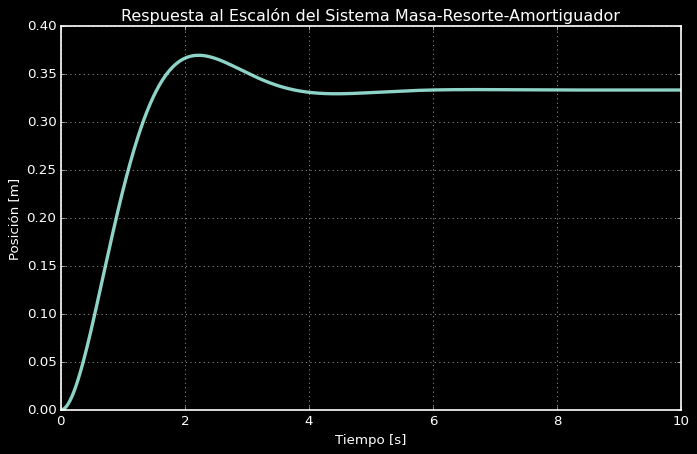


Autovalores del sistema:
[-1.+1.41421356j -1.-1.41421356j]


In [30]:
# Ejemplo 6: Sistema en espacio de estados
# Sistema masa-resorte-amortiguador
# mx'' + bx' + kx = F
# donde m = 1kg, b = 2 N⋅s/m, k = 3 N/m

# Definir matrices del sistema
m = 1.0  # masa
b = 2.0  # coeficiente de amortiguamiento
k = 3.0  # constante del resorte

A = np.array([[0, 1],
              [-k/m, -b/m]])
B = np.array([[0],
              [1/m]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Crear sistema en espacio de estados
sys_ss = control.ss(A, B, C, D)

# Convertir a función de transferencia
sys_tf = control.ss2tf(sys_ss)
print("Función de transferencia equivalente:")
print(sys_tf)

# Simular respuesta al escalón
t = np.linspace(0, 10, 1000)
t, y = control.step_response(sys_ss, t)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid(True)
plt.title('Respuesta al Escalón del Sistema Masa-Resorte-Amortiguador')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.show()

# Calcular y mostrar autovalores (polos del sistema)
eigvals, eigvecs = np.linalg.eig(A)
print("\nAutovalores del sistema:")
print(eigvals)

# Asignación de Polos mediante Fórmula de Ackerman

La fórmula de Ackerman es un método para el diseño de controladores por realimentación de estados que permite colocar los polos del sistema en lazo cerrado en posiciones deseadas. 

## Teoría

Para un sistema en la forma canónica controlable:

$\dot{x} = Ax + Bu$

La ley de control por realimentación de estados es:

$u = -Kx$

La fórmula de Ackerman nos permite calcular K:

$K = [0 \cdots 0 \; 1][B \; AB \; A^2B \; \cdots \; A^{n-1}B]^{-1}\alpha(A)$

donde $\alpha(A)$ es el polinomio característico deseado evaluado en la matriz A.

Rango de la matriz de controlabilidad: 2
Dimensión del sistema: 2
El sistema es controlable

Matriz de ganancia K:
[[17.81  4.  ]]
K shape: (1, 2)


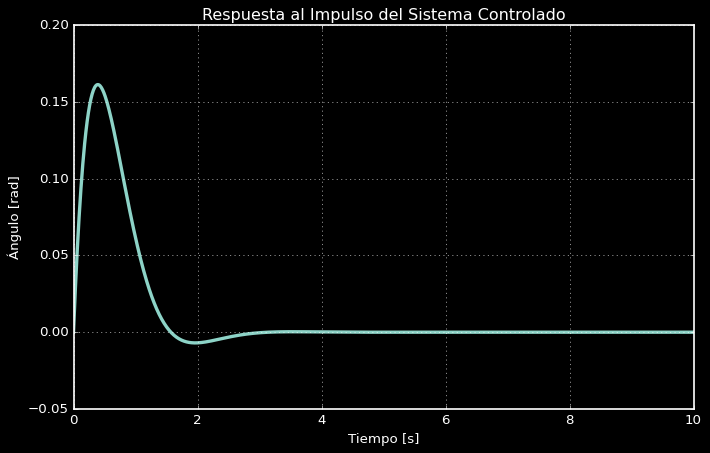


Polos del sistema en lazo cerrado:
[-2.+2.j -2.-2.j]


In [34]:
# Ejemplo 7: Diseño de controlador usando la fórmula de Ackerman
# Sistema: Péndulo invertido simplificado
# Variables de estado: x1 = ángulo, x2 = velocidad angular

import control.matlab as cm  # Para usar la función acker

# Parámetros del sistema
g = 9.81    # Aceleración de la gravedad
l = 1.0     # Longitud del péndulo
m = 1.0     # Masa

# Matrices del sistema linealizado alrededor del punto de equilibrio superior
A = np.array([[0, 1],
              [g/l, 0]])
B = np.array([[0],
              [1/(m*l**2)]])
C = np.array([[1, 0]])

# Verificar controlabilidad
Co = control.ctrb(A, B)
rank_Co = np.linalg.matrix_rank(Co)
print(f"Rango de la matriz de controlabilidad: {rank_Co}")
print(f"Dimensión del sistema: {A.shape[0]}")
print(f"El sistema {'es' if rank_Co == A.shape[0] else 'no es'} controlable")

# Polos deseados para el sistema en lazo cerrado
# Elegimos polos con parte real negativa para estabilidad
p1, p2 = -2 + 2j, -2 - 2j
desired_poles = [p1, p2]

# Calcular la ganancia K usando acker (implementación de Ackerman)
K = cm.acker(A, B, desired_poles)
# Acker puede devolver un vector 1-D; forzamos K a fila 2D (1 x n)
K = np.array(K)
if K.ndim == 1:
    K = K.reshape(1, -1)
elif K.shape[0] > K.shape[1]:
    # Si por alguna razón viene como columna (n x 1), convertir a fila
    K = K.reshape(1, -1)

print("\nMatriz de ganancia K:")
print(K)
print(f"K shape: {K.shape}")

# Construir A_cl = A - B*K (B @ K => (n x 1) @ (1 x n) = n x n)
A_cl = A - B @ K

# Crear sistema en lazo cerrado
# D se define con dimensiones apropiadas (outputs x inputs)
D = np.zeros((C.shape[0], B.shape[1]))
sys_cl = control.ss(A_cl, B, C, D)

# Simular respuesta al impulso
t = np.linspace(0, 10, 1000)
T, y = control.impulse_response(sys_cl, T=t)
# Acomodar dimensiones de y para graficar (y puede venir como (outputs, len(t)))
y = np.squeeze(y)

# Graficar respuesta
plt.figure(figsize=(10, 6))
plt.plot(T, y)
plt.grid(True)
plt.title('Respuesta al Impulso del Sistema Controlado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

# Verificar polos del sistema en lazo cerrado
poles_cl = np.linalg.eigvals(A_cl)
print("\nPolos del sistema en lazo cerrado:")
print(poles_cl)